In [1]:
import data_smoothing
import find_peaks
import peak_character
import peak_classify

# Load real TA data

In [30]:
data_nm, data_time_uncorr, data_z_uncorr = data_smoothing.load_data_csv('exp06_20180119 -t0 -chirp.csv', 500, 800)

In [32]:
data_time_start = data_smoothing.find_nearest(data_time, 1)
data_time = data_time_uncorr[data_time_start:]
data_z = data_z_uncorr[:, data_time_start:]

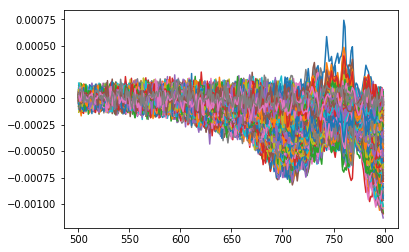

In [33]:
plt.figure()
for i in range(len(data_time)):
    plt.plot(data_nm, data_z[:, i])

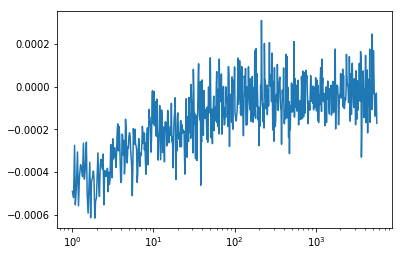

In [34]:
plt.figure()
plt.plot(data_time, data_z[198, :])
plt.xscale('log')

# Smoothen data

In [35]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


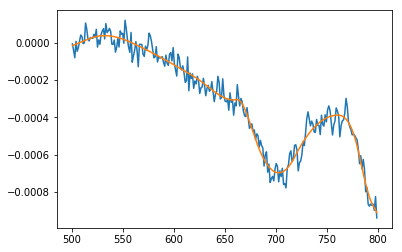

In [41]:
plt.figure()
#for i in range(len(data_time)):
plt.plot(data_nm, data_z[:, 10])
plt.plot(data_nm, np.array(smooth_matx)[:, 10])

# Find peaks

In [42]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [59]:
idx.loc[10]

0      27.0
1     134.0
2     171.0
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
Name: 10, dtype: float64

In [60]:
data_nm[27]

532.12

# convert peak index to nm

In [44]:
import numpy as np
idx_np = np.nan_to_num(np.array(idx))

peak1 = np.empty(len(data_time))
peak2 = np.empty_like(peak1)
for i in range(np.shape(idx_np)[0]):
    peak1[i] = data_nm[int(idx_np[:, 0][i])]
    peak2[i] = data_nm[int(idx_np[:, 1][i])]

In [45]:
peak1

array([539.155, 540.328, 536.809, 541.502, 529.776, 537.982, 546.196,
       704.916, 709.697, 537.982, 532.12 , 542.675, 534.464, 543.849,
       533.292, 546.196, 703.721, 704.916, 706.111, 706.111, 704.916,
       646.55 , 708.501, 548.545, 648.925, 652.489, 712.088, 656.054,
       532.12 , 536.809, 657.242, 542.675, 530.948, 537.982, 702.526,
       648.925, 706.111, 709.697, 644.176, 653.677, 543.849, 567.353,
       537.982, 527.433, 540.328, 706.111, 536.809, 702.526, 709.697,
       559.12 , 645.363, 533.292, 543.849, 707.306, 556.768, 552.068,
       561.471, 526.261, 646.55 , 556.768, 539.155, 645.363, 500.53 ,
       707.306, 539.155, 702.526, 535.637, 709.697, 535.637, 706.111,
       532.12 , 541.502, 552.068, 540.328, 702.526, 528.604, 642.989,
       560.295, 653.677, 536.809, 532.12 , 537.982, 715.677, 745.635,
       526.261, 701.331, 651.301, 537.982, 536.809, 704.916, 532.12 ,
       526.261, 722.858, 710.892, 701.331, 527.433, 708.501, 714.48 ,
       528.604, 702.

In [46]:
import remove_outlier as outlier
import matplotlib.pyplot as plt

In [47]:
peak1_corr = outlier.id_outliers_replacewith_interp(data_time, peak1, 1, 50)

12


In [48]:
peak1_isotonic = outlier.isotonic(data_time, peak1_corr)

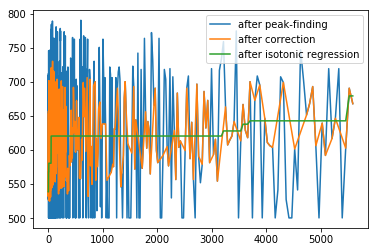

In [64]:
plt.figure()

plt.plot(data_time, peak1, label = 'after peak-finding')
plt.plot(data_time, peak1_corr, label = 'after correction')
plt.plot(data_time, peak1_isotonic, label = 'after isotonic regression')
plt.legend()

In [65]:
corrected_output = peak_classify.data_grouping(idx, height, fwhm)

In [66]:
peak_dict = peak_classify.cluster_classifier(idx, corrected_output)

In [112]:
peak_dict

{'peak_0': [array([1.77000000e+02, 1.64591962e-05, 3.95040000e+01, 2.94000000e+02]),
  array([1.50000000e+02, 6.39055028e-06, 2.50170000e+01, 3.20000000e+02]),
  array([1.5400000e+02, 1.4791026e-05, 4.7680000e+00, 3.2500000e+02]),
  array([1.57000000e+02, 2.61027754e-05, 2.85850000e+01, 3.55000000e+02]),
  array([1.44000000e+02, 2.76444918e-05, 3.57100000e+00, 3.81000000e+02]),
  array([1.66000000e+02, 2.99829894e-05, 1.79090000e+01, 3.97000000e+02]),
  array([1.62000000e+02, 4.75374951e-05, 3.57830000e+01, 4.03000000e+02]),
  array([1.45000000e+02, 3.89138782e-05, 4.76230000e+01, 4.05000000e+02]),
  array([1.54000000e+02, 2.23279238e-05, 3.57600000e+00, 4.36000000e+02]),
  array([1.67000000e+02, 5.85565497e-05, 3.46240000e+01, 4.37000000e+02]),
  array([1.62000000e+02, 2.07811412e-05, 2.14840000e+01, 4.39000000e+02]),
  array([1.66000000e+02, 1.84208599e-05, 3.10330000e+01, 4.49000000e+02]),
  array([1.39000000e+02, 4.45369626e-06, 3.56900000e+00, 4.52000000e+02]),
  array([1.44000000

In [126]:
peaks = np.empty(11)
for i in range(11):
    peaks[i] = data_nm[int(np.array(peak_dict['peak_%s' % i])[:, 0][0])]

In [127]:
peaks

array([709.697, 500.53 , 758.847, 689.394, 559.12 , 560.295, 691.781,
       724.055, 539.155, 589.741, 757.646])

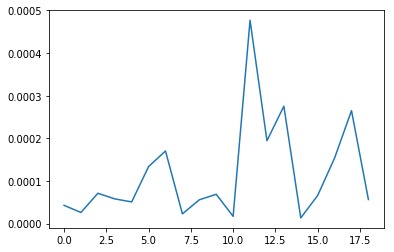

In [133]:
peak = np.array(peak_dict['peak_10'])[:, 1]
plt.figure()
plt.plot(np.arange(0, len(peak)), peak)

# peak #2

In [61]:
peak2_corr = outlier.id_outliers_replacewith_interp(data_time, peak2, 1, 100)

6


In [62]:
peak2_isotonic = outlier.isotonic(data_time, peak2_corr)

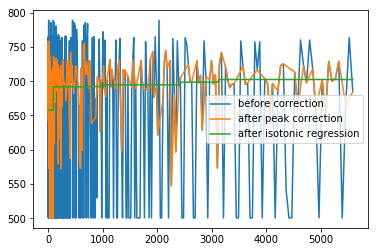

In [63]:
plt.figure()
plt.plot(data_time, peak2, label = 'before correction')
plt.plot(data_time, peak2_corr, label = 'after peak correction')
plt.plot(data_time, peak2_isotonic, label = 'after isotonic regression')
plt.legend()